In [3]:
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(p_h, theta=0.0001, gamma=1.0, max_iter=1000):
    V = np.zeros(101)
    policy = np.zeros(100)
    rewards = np.zeros(101)
    rewards[100] = 1

    def one_step_lookahead(s, V, rewards):
        A = np.zeros(101)
        for a in range(1, min(s, 100 - s) + 1):
            A[a] = p_h * (rewards[s + a] + gamma * V[s + a]) + (1 - p_h) * (rewards[s - a] + gamma * V[s - a])
        return A

    for _ in range(max_iter):
        delta = 0
        for s in range(1, 100):
            v = V[s]
            A = one_step_lookahead(s, V, rewards)
            V[s] = np.max(A)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break

    for s in range(1, 100):
        A = one_step_lookahead(s, V, rewards)
        policy[s] = np.argmax(A)

    return V, policy

In [4]:
def plot_results(V, policy, p_h):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(V)
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')
    plt.title('Value Estimates vs Capital (p_h = {})'.format(p_h))

    plt.subplot(1, 2, 2)
    plt.bar(np.arange(100), policy)
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    plt.title('Final Policy vs Capital (p_h = {})'.format(p_h))
    plt.show()

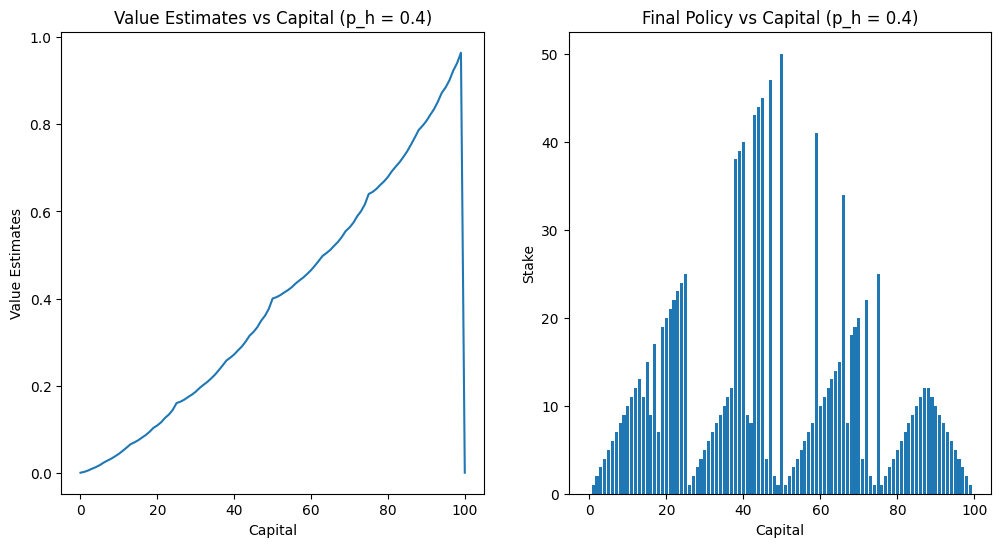

In [5]:
p_h=0.4
V,policy = value_iteration(p_h)
plot_results(V, policy, p_h)

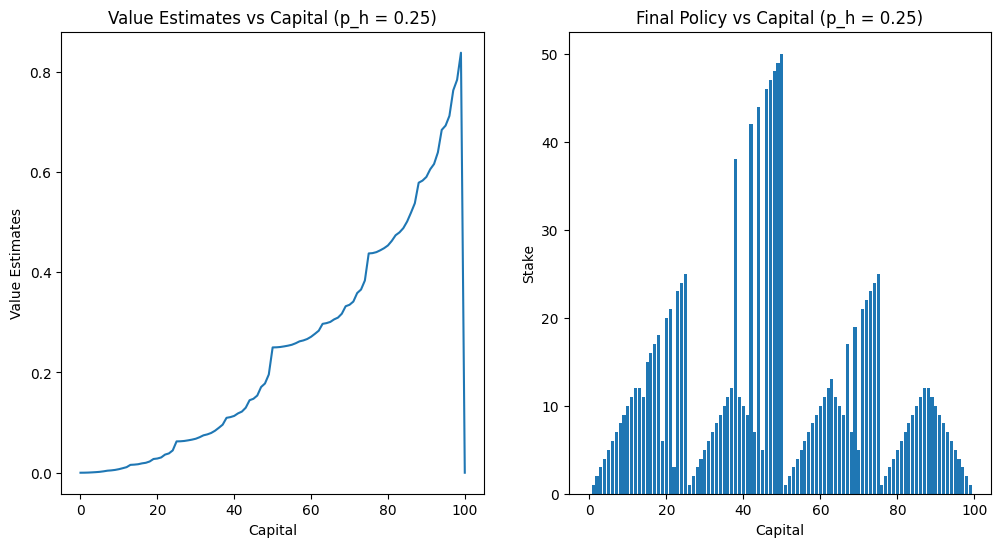

In [7]:
p_h=0.25
V,policy = value_iteration(p_h)
plot_results(V, policy, p_h)

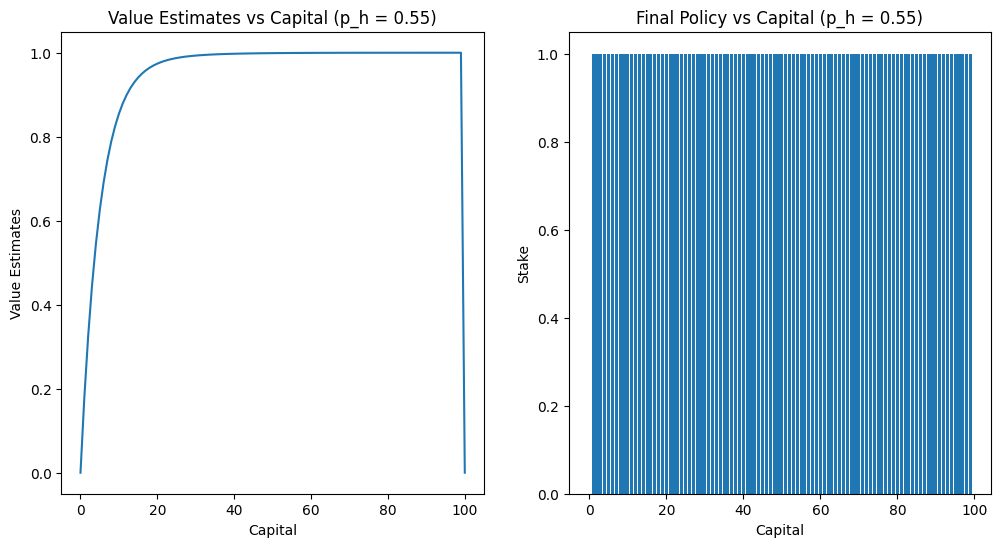

In [10]:
p_h=0.55
V,policy = value_iteration(p_h)
plot_results(V, policy, p_h)

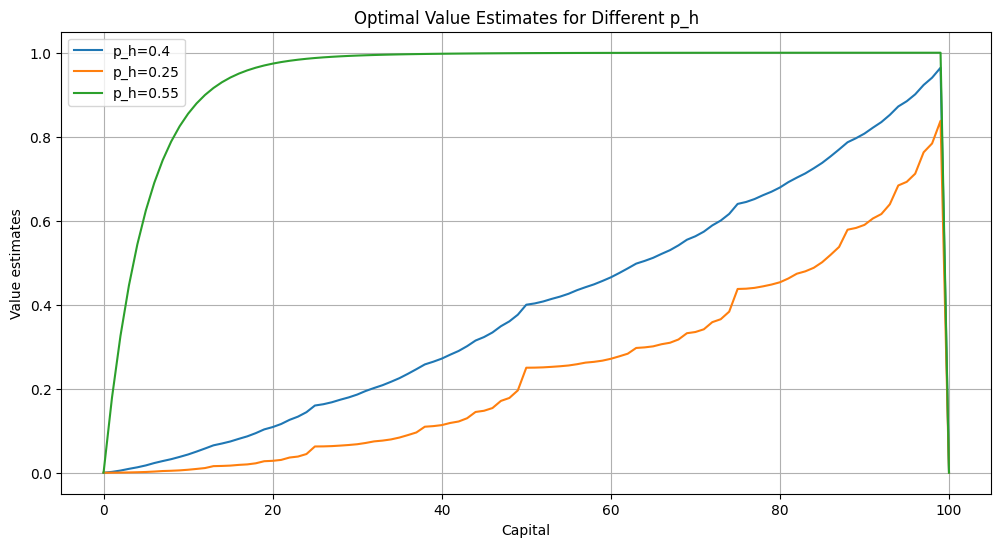

In [9]:
p_h_values = [0.4, 0.25, 0.55]

plt.figure(figsize=(12, 6))

for p_h in p_h_values:
    V, policy = value_iteration(p_h)
    plt.plot(V, label=f'p_h={p_h}')

plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.title('Optimal Value Estimates for Different p_h')
plt.legend()
plt.grid(True)
plt.show()